# Computer science center
## Математика для разработчиков
Семинар 2. Математический анализ

## Предел последовательности

In [1]:
def odds():
    i = 1
    while True:
        yield i
        i += 2
gen_odd = odds()

In [2]:
[next(gen_odd) for i in range(10)]

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19]

In [3]:
def sqrt2():
    a = 1
    while True:
        a = 0.5 * (a + 2 / a)
        yield a
gen_sqrt2 = sqrt2()

In [4]:
for i in range(5):
    print(next(gen_sqrt2))

1.5
1.4166666666666665
1.4142156862745097
1.4142135623746899
1.414213562373095


In [5]:
print("eps = ", 2**0.5 - next(gen_sqrt2))

eps =  2.220446049250313e-16


In [6]:
def some_seq():
    n = 1
    while True:
        yield n**3/(n**2 + 5) - 2*n**2/(2*n - 1)
        n += 1
gen_seq = some_seq()

In [7]:
for i in range(10000):
    tmp = next(gen_seq)

In [8]:
[next(gen_seq) for i in range(5)]

[-0.500524948729435,
 -0.5005248962461337,
 -0.5005248437719274,
 -0.500524791308635,
 -0.5005247388544376]

## Число e

In [9]:
def e():
    n = 1
    while True:
        yield (1 + 1/n)**n
        n += 1
gen_e = e()

In [10]:
for i in range(10**7):
    tmp = next(gen_e)

In [11]:
[next(gen_e) for i in range(5)]

[2.718281694349334,
 2.718281694566533,
 2.718281694783677,
 2.718281695000767,
 2.718281695217802]

In [12]:
def e_faster():
    s, n, fact = 1, 0, 1
    while True:
        yield s
        n += 1
        fact *= n
        s += 1 / fact
gen_e_faster = e_faster()

In [13]:
for i in range(10):
    tmp = next(gen_e_faster)

In [14]:
[next(gen_e_faster) for i in range(5)]

[2.7182818011463845,
 2.718281826198493,
 2.7182818282861687,
 2.7182818284467594,
 2.71828182845823]

## Графики

In [1]:
from matplotlib import pyplot as plt
%matplotlib inline

import numpy as np

xs = np.linspace(-5, 5, 100)
ys = [x*x*x - 10 for x in xs]

def map_abs(xs):
    return list(map(abs, xs)) 


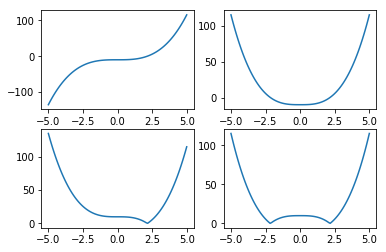

In [2]:
# x^3-10
plt.subplot (2, 2, 1)
plt.plot(xs, ys)

# |x|^3-10
plt.subplot (2, 2, 2)
plt.plot(xs, [abs(x*x*x) - 10 for x in xs])

# |x^3-10|
plt.subplot (2, 2, 3)
plt.plot(xs, map_abs(ys))

# ||x|^3-10|
plt.subplot (2, 2, 4)
plt.plot(xs, map_abs([abs(x*x*x) - 10 for x in xs]))

In [3]:
plt.show()

## Производная

Определим _приближенную_ производную функции $f(x)$ как
$$
g(x, \delta) = \frac{f(x + \delta) - f(x)}{\delta}
$$

Производная функции $𝑒^𝑥$ при $x=0$ равна 1. 

**Задача 2.1.** Вычислите приближённую производную по формуле выше для $\delta = 10^{−2𝑛}$ и $𝑛 = 1, \dots , 7$. Результаты должны сначала улучшаться, потом ухудшиться. Объясните, почему так происходит.

In [16]:
def g(f, x, dx):
    return (f(x + dx) - f(x)) / dx

In [17]:
import math

for n in range(9):
    print(f"n = {n}, ", f"g = {g(math.exp, 0, 10**(-2*n))}")

n = 0,  g = 1.718281828459045
n = 1,  g = 1.005016708416795
n = 2,  g = 1.000050001667141
n = 3,  g = 1.0000004999621837
n = 4,  g = 0.999999993922529
n = 5,  g = 1.000000082740371
n = 6,  g = 1.000088900582341
n = 7,  g = 0.9992007221626409
n = 8,  g = 0.0


## Интеграл

In [18]:
from scipy.integrate import quad

def integrand(x):
    return abs(x - 3)

result = quad(integrand, 1.0, 6.0)
print(f"The result is {result}.")

The result is (6.500000000000002, 7.216449660063519e-15).


## Фрактал Мандельброта

In [19]:
def in_mandelbrot_set(c):
    z = complex(0,0)
    for i in range(100):
        z = z*z + c
        if abs(z) > 2:
            return False
    return True

In [20]:
in_mandelbrot_set(complex(0,0))
in_mandelbrot_set(complex(2,2))

True

False

In [21]:
def gen_mask(N):
    x = np.linspace(-2, 2, N)
    y = np.linspace(-2, 2, N)
    mask = np.zeros((N, N))
    for i in range(N):
        for j in range(N):
            mask[i, j] = int(in_mandelbrot_set(complex(x[i], y[j])))
    return mask

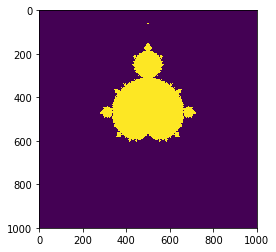

In [22]:
plt.imshow(gen_mask(1000))

**Задача 2.2.**

Напишите функцию iteration_number, возвращающую логарифм числа итераций, после которого модуль становится больше 2. Нарисуйте результат через imshow.

Попробуйте задать попбольше точек и отобразить только часть всего изображения фрактала Мандельброта.

## Числа Бернулли

In [23]:
from fractions import Fraction as Fr

def bernoulli():
    A, m = [], 0
    while True:
        A.append(Fr(1, m+1))
        for j in range(m, 0, -1):
            A[j-1] = j*(A[j-1] - A[j])
        yield A[0] # (which is Bm)
        m += 1
 
bn = [ix for ix in zip(range(16), bernoulli())]
bn = [(i, b) for i, b in bn if b]
width = max(len(str(b.numerator)) for i,b in bn)
for i, b in bn:
    print('B(%2i) = %*i/%i' % (i, width, b.numerator, b.denominator))

B( 0) =    1/1
B( 1) =    1/2
B( 2) =    1/6
B( 4) =   -1/30
B( 6) =    1/42
B( 8) =   -1/30
B(10) =    5/66
B(12) = -691/2730
B(14) =    7/6


Сравните с формулой (8) [отсюда](http://www.fourmilab.ch/babbage/sketch.html).

Спасибо за внимание, всё на сегодня.